In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
ann=pd.read_csv('/content/drive/My Drive/annotation.csv')
ann.head()

,image,labels
0,20151127_130005,"['bread', 'pizzoccheri', 'potatoes', 'savory_p..."
1,20151204_121047,['lasagna_bolognese']
2,20151204_121641,['lasagna_bolognese']
3,20151211_134539_2,"['bread', 'pasta', 'fillet_fish', 'potatoes', ..."
4,20151130_114633_1,"['bread', 'pasta', 'meat', 'peas']"


In [0]:
a=os.listdir('/content/drive/My Drive/data')
img=[]
for i in range(len(a)):
    img.append(mpimg.imread('/content/drive/My Drive/data/'+a[i]))   

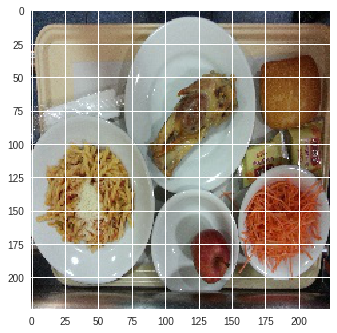

In [10]:
q=plt.imshow(img[1])

In [11]:
img[8].shape

(224, 224, 3)

In [0]:
an=np.zeros((1400,1))
k=0
for i in ann['image']:
    for j in range(len(a)):
        if str(i)+'.jpg'==a[j]:
            an[k]=j
            k+=1          

In [13]:
len(ann)

1400

In [0]:
ann['index']=an

In [15]:
ann.head()

,image,labels,index
0,20151127_130005,"['bread', 'pizzoccheri', 'potatoes', 'savory_p...",1013.0
1,20151204_121047,['lasagna_bolognese'],161.0
2,20151204_121641,['lasagna_bolognese'],182.0
3,20151211_134539_2,"['bread', 'pasta', 'fillet_fish', 'potatoes', ...",641.0
4,20151130_114633_1,"['bread', 'pasta', 'meat', 'peas']",1203.0


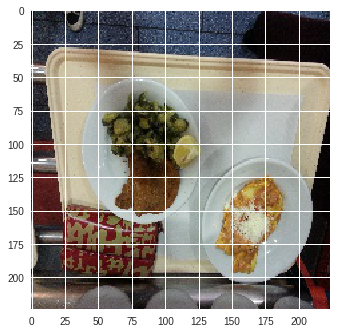

In [16]:
plt.imshow(img[284])

In [0]:
ann_sort=ann.sort_values(['index'])

In [0]:
import ast
b = ann_sort['labels'].apply(ast.literal_eval)

In [21]:

ann_sort.head()

,image,labels,index
561,20151203_125638_1,"['yogurt', 'pasta', 'squid_stew']",0.0
444,20151203_1252580,"['bread', 'apple', 'carrot', 'meat', 'pasta']",1.0
962,20151127_122553_2,"['tangerine', 'savory_pie', 'spinach', 'pizzoc...",2.0
1105,20151203_130529,"['yogurt', 'pasta', 'meat', 'carrot']",3.0
244,20151203_125657_2,"['bread', 'pears', 'pasta', 'meat', 'green_bea...",4.0


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
y=mlb.fit_transform(b)
clss=mlb.classes_

In [23]:
d={}
for i,cl in enumerate(clss):
    d[i]=cl
print(d)

{0: 'apple', 1: 'banana', 2: 'bread', 3: 'bruscitt', 4: 'cake', 5: 'carrot', 6: 'cutlet', 7: 'fennel_gratin', 8: 'fillet_fish', 9: 'fries', 10: 'green_beans', 11: 'lasagna_bolognese', 12: 'meat', 13: 'orange', 14: 'pasta', 15: 'pears', 16: 'peas', 17: 'pizza', 18: 'pizzoccheri', 19: 'potatoes', 20: 'pudding', 21: 'rice', 22: 'salad', 23: 'salmon', 24: 'salty_cake', 25: 'savory_pie', 26: 'scallops', 27: 'soup', 28: 'spinach', 29: 'squid_stew', 30: 'tangerine', 31: 'wet_zucchini', 32: 'yogurt'}


In [0]:
data_img=np.ndarray((1400,224,224,3))
count=len(img)
for i in range(1400):
    data_img[i]=img[i]

In [25]:
print(data_img.shape)
print(y.shape)

(1400, 224, 224, 3)
(1400, 33)


In [0]:
data_img=data_img/255 #Normalizing the data

In [27]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,vertical_flip=True,zoom_range=[0.2,0.5])

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation,Conv2D,AveragePooling2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_img, y, test_size=0.15, random_state=42)

In [30]:
sgd=Adam()
optimizer=sgd
Loss='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(224,224,3), activation='relu'))
#model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
#model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
#model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(33))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,..., activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", padding="same")`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss=Loss, optimizer=optimizer, metrics=['accuracy'])

In [0]:
from sklearn.metrics import f1_score

In [34]:
num_epochs=5
for i in range(num_epochs):
    print('EPOCH NO', i+1)
    #model1.fit(X_train,y_train,epochs=1,batch_size=200,shuffle=True)
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),steps_per_epoch=len(X_train) / 128, epochs=1,validation_data=(X_test,y_test),shuffle=True)
    preds=model.predict(X_test)
    preds[preds>=0.5] = 1
    preds[preds<0.5] = 0
    f1=f1_score(y_test,preds,average='micro')
    print('F1 score for test data is',f1)
    
    

EPOCH NO 1
Instructions for updating:
Use tf.cast instead.
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/9 [================================] - 212s 21s/step - loss: 2.7603 - acc: 0.6091 - val_loss: 0.8077 - val_acc: 0.8427
F1 score for test data is 0.2158273381294964
EPOCH NO 2
Epoch 1/1
10/9 [================================] - 210s 21s/step - loss: 0.7459 - acc: 0.6857 - val_loss: 0.5475 - val_acc: 0.6817
F1 score for test data is 0.0959016393442623
EPOCH NO 3
Epoch 1/1
10/9 [================================] - 206s 21s/step - loss: 0.5978 - acc: 0.7287 - val_loss: 0.4598 - val_acc: 0.8247
F1 score for test data is 0.05300077942322681
EPOCH NO 4
Epoch 1/1
10/9 [================================] - 206s 21s/step - loss: 0.5261 - acc: 0.7975 - val_loss: 0.3918 - val_acc: 0.8906
F1 score for test data is 0.010443864229765011
EPOCH NO 5
Epoch 1/1
10/9 [================================] - 205s 21s/step - loss: 0.4746 - acc: 0.8344 - val_loss: 0.3690 - val_acc: 0.8903
F1 score for test data is 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      448       
_________________________________________________________________
average_pooling2d_1 (Average (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
__________

In [0]:
preds=model.predict(X_test)
preds[preds>=0.5] = 1
preds[preds<0.5] = 0
f1=f1_score(y_test,preds,average='micro')
print('F1 score for test data is',f1)
    

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


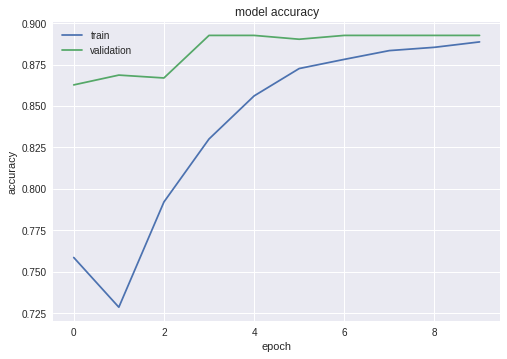

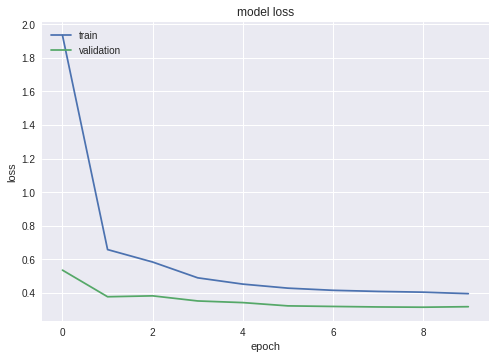

In [0]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
model.evaluate(X_test,y_test)

210/210 [==============================] - 12s 56ms/step


[0.31796189546585085, 0.8926406843321664]

In [0]:
loc=os.getcwd()
model.save(loc+'/saved_model.h5') 